In [1]:
'''PACKAGE IMPORTS'''
#Use gis_env for this script
### for data analysis
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns

### for custom legends
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from rasterio.plot import show
from matplotlib.colors import LinearSegmentedColormap

### geopandas, for dealing with shapefiles as Pandas dataframes
import geopandas as gpd
from pyproj import Proj, transform

### contextily, for base maps
import contextily as cx
### rasterio for DEM
import osgeo
import rasterio

In [24]:
'''Import Marcell Shapefiles'''

#Import watershed shapefiles
mef = gpd.read_file("./Cleaned Data/GIS/watersheds/S2S6.shp", 
                    crs="EPSG:4269")

#Import veg stakes dataframe - covert to geopandas
veg_stakes_data = pd.read_csv("./Cleaned Data/GIS/GridCoordinates.csv")
veg_stakes = gpd.GeoDataFrame(
    veg_stakes_data, 
    geometry = gpd.points_from_xy(veg_stakes_data.EASTING, veg_stakes_data.NORTHING), 
    crs="EPSG:32633")

#Import soil moisture stake info
soil_stakes_data = pd.read_csv("./Cleaned Data/Historical/Location_info.csv")
soil_stakes = gpd.GeoDataFrame(
    soil_stakes_data, 
    geometry = gpd.points_from_xy(soil_stakes_data.EASTING, soil_stakes_data.NORTHING), 
    crs="EPSG:32633")

#Change MEF shapefiles projection
mef_proj = mef.to_crs({'init':'EPSG:2027'})
#Translate mef shapefile
mef_proj = mef_proj.translate(xoff = -25, yoff = 220)
mef_proj = mef_proj.scale(xfact = 1.2, yfact = 1.2)

#Import DEM
dem = rasterio.open("./Cleaned Data/GIS/dem_mef.tif")

c:\Users\marie\anaconda3\envs\gis_env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [25]:
soil_stakes_s2

,CATCHMENT,LOCATION,TYPE,LONGITUDE,LATITUDE,SLOPE,ASPECT,NORTHING,EASTING,geometry
0,S2,S2S_UP,upland,-93.468835,47.513117,13,342,5262294.01,464699.26,POINT (5262294.010 464699.260)
1,S2,S2S_LO,upland,-93.468851,47.513268,10,356,5262310.80,464698.19,POINT (5262310.800 464698.190)
2,S2,S2S_MI,upland,-93.468849,47.513211,10,353,5262304.47,464698.25,POINT (5262304.470 464698.250)
3,S2,S2N_LO,upland,-93.468261,47.514430,9,188,5262439.65,464743.34,POINT (5262439.650 464743.340)
4,S2,S2N_MI,upland,-93.468224,47.514486,9,189,5262445.92,464746.15,POINT (5262445.920 464746.150)
5,S2,S2N_UP,upland,-93.468193,47.514531,14,189,5262450.88,464748.58,POINT (5262450.880 464748.580)


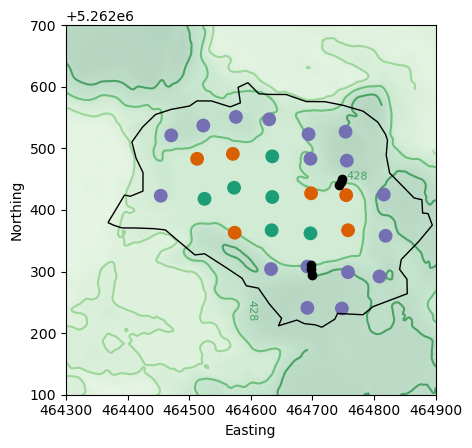

In [30]:
'''Subset to S2'''
#Clip spatial data to S2
veg_stakes_s2 = veg_stakes.cx[:, 5262200:5262600]
soil_stakes_s2 = soil_stakes.cx[:, 5262200:5262600]

#%%
'''Plot'''

custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#1b9e77', '#d95f02', '#7570b3'], N = 3)

fig, ax = plt.subplots()

#extent=[veg_stakes_s2.total_bounds[0], veg_stakes_s2.total_bounds[2], veg_stakes_s2.total_bounds[1], veg_stakes_s2.total_bounds[3]]
ax = rasterio.plot.show(dem, alpha = 0.3,
                        ax=ax, cmap = 'Greens')
ax = rasterio.plot.show(dem, 
                        contour = True,
                        ax=ax, cmap = 'Greens')

ax = mef_proj.plot(color = 'none', edgecolor = 'black', 
                   ax = ax, zorder = 8)

veg_stakes_s2.plot(column = 'ZONE', k=3, categorical=True,
                   cmap = custom_cmap, ax=ax, 
                   zorder = 7, 
                   s = 80)

soil_stakes_s2.plot(ax=ax, 
                    zorder = 10, 
                    color = 'black')

#Stake labels
#for idx,row in veg_stakes.iterrows():
#    x = row[2]
#    y = row[3]
#    lab = row[0]
#    plt.text(x, y+15, lab, va='baseline', ha='center')

ax.set_ylim(5262100.0, 5262700.0)
ax.set_xlabel('Easting')
ax.set_xlim(464300.0, 464900.0)
ax.set_ylabel('Northing')

plt.savefig('../Figures/laiPlots/mapPlotS2.pdf')

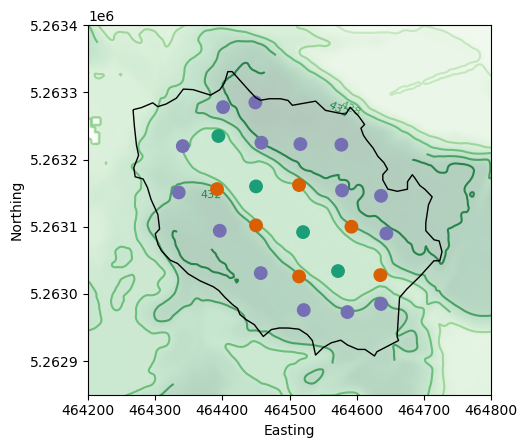

In [31]:
'''Subset to S6'''

#Clip spatial data to S6
veg_stakes_s6 = veg_stakes.cx[:, 5262900:5263400]
#%%
'''Plot'''

fig, ax = plt.subplots()

#extent=[veg_stakes_s2.total_bounds[0], veg_stakes_s2.total_bounds[2], veg_stakes_s2.total_bounds[1], veg_stakes_s2.total_bounds[3]]
ax = rasterio.plot.show(dem, alpha = 0.3,
                        ax=ax, cmap = 'Greens')
ax = rasterio.plot.show(dem, 
                        contour = True,
                        ax=ax, cmap = 'Greens')

ax = mef_proj.plot(color = 'none', edgecolor = 'black', 
                   ax = ax, zorder = 8)

veg_stakes_s6.plot(column = 'ZONE', k=3, categorical=True,
                   cmap = custom_cmap, ax=ax, 
                   zorder = 7, 
                   s = 80)

ax.set_ylim(5262850.0, 5263400.0)
ax.set_ylabel('Northing')
ax.set_xlim(464200.0, 464800.0)
ax.set_xlabel('Easting')

plt.savefig('../Figures/laiPlots/mapPlotS6.pdf')
